In [2]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
import altair as alt
from vega_datasets import data

In [4]:
Data = pd.read_csv('../../../data/OriginalData.csv')
Data.head()

,Dates,symbol,PX_LAST,Dividend_Per_Share,TOTAL_EQUITY,CUR_MKT_CAP,gics_sector_name,gics_sub_industry_name,gics_industry_name,gics_industry_group_name,...,NUM_CEOS_EQUIV_INC_COMP_PD,CEO_TENURE_AS_OF_FY_END,TOT_COMP_AW_TO_CFO_EQUIV,TOT_COMP_AW_TO_COO_EQUIV,TOTAL_BOD_COMPENSATION_AWARDED,TOTAL_BOD_FEES_PAID_IN_CASH,TOTAL_BOD_STOCK_AWARDS_GIVEN,NUMBER_OF_BOD_CHANGES_DURING_FY,DATE_OF_LAST_BOD_CHANGE,NUM_DIR_INC_IN_CMPNSTN_PD
0,2014-04-11,AAPL,18.5580,0.1089,120179.000,463486.4114,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,...,1,3.7500,18520521.0,0,2638340.0,697500.0,1906645.0,2,2014-07-17,8
1,2014-04-11,AMT,80.5500,0.3200,3701.605,31870.1921,Real Estate,Telecom Tower REITs,Specialized REITs,Equity Real Estate Investment Trusts (REITs),...,1,11.2500,4904866.0,0,1975088.0,775000.0,600071.0,1,2014-12-18,9
2,2014-04-11,AMZN,15.5870,0.0000,10328.000,143440.4076,Consumer Discretionary,Broadline Retail,Broadline Retail,Consumer Discretionary Distribution & Retail,...,1,18.6670,5962307.0,0,797000.0,0.0,797000.0,1,2014-07-31,9
3,2014-04-11,BHP,58.8727,0.0000,82279.000,180544.3056,Materials,Diversified Metals & Mining,Metals & Mining,Materials,...,1,1.1667,4639000.0,0,4695000.0,3617000.0,0.0,1,2014-04-15,13
4,2014-04-11,CAT,101.4500,0.6000,20369.000,64707.0750,Industrials,Construction Machinery & Heavy Transportation ...,Machinery,Capital Goods,...,1,4.5000,5286968.0,0,3206983.0,1714174.0,1375110.0,1,2014-12-31,11


In [5]:
Columns = ["gics_sector_name",'symbol', 'year', 'yearlyReturn',"equity_Compensation_CEO","equity_Compensation_EXECS","cash_incentive_CEO","Variable_Pay_CEO","cash_incentive_CEO_percent","fixed_Pay_CEO","cash_incentive_EXECS","Variable_Pay_EXECS","cash_incentive_EXECS_percent"]
df = pd.DataFrame(columns=Columns)
for symbol, group_symbol in Data.groupby('symbol'):
  for year, group_year in group_symbol.groupby("Year"):
      yearlyReturn = group_year["PX_LAST"].iloc[-1]/group_year["PX_LAST"].iloc[0]

      gics_sector_name = group_year["gics_sector_name"].iloc[0]


      #CEO

      #equity based compensation
      equity_Compensation_CEO = (group_year['TOT_STK_AWD_GIVEN_TO_CEO_EQUIV'].iloc[-1]+group_year["TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV"].iloc[-1])/1000
      #/(1000000*group_year["TOTAL_EQUITY"].iloc[-1])

      #non eqity based compensation (cash)

      cash_incentive_CEO = +group_year['TOT_BONUSES_PAID_TO_CEO_EQUIV'].iloc[-1]+group_year['TOT_N_EQT_INCENT_GVN_TO_CEO_EQ'].iloc[-1]
      Variable_Pay_CEO = cash_incentive_CEO+equity_Compensation_CEO
      cash_incentive_CEO_percent = cash_incentive_CEO/Variable_Pay_CEO

      #Fixed Pay
      fixed_Pay_CEO = group_year['TOT_SALARIES_PAID_TO_CEO_EQUIV'].iloc[-1]/group_year["NUM_CEOS_EQUIV_INC_COMP_PD"].iloc[-1]

      #Executive

      #equity based compensation
      equity_Compensation_EXECS = (group_year['TOT_STK_AWARDS_GIVEN_TO_EXECS'].iloc[-1]+group_year["TOT_OPTION_AWARDS_GIVEN_TO_EXECS"].iloc[-1])/1000

      #non eqity based compensation (cash)

      cash_incentive_EXECS = group_year['TOTAL_BONUSES_PAID_TO_EXECUTIVES'].iloc[-1]+group_year['TOT_N_EQTY_INCENT_GIVEN_TO_EXECS'].iloc[-1]- cash_incentive_CEO
      Variable_Pay_EXECS = equity_Compensation_EXECS+cash_incentive_EXECS-Variable_Pay_CEO
      cash_incentive_EXECS_percent = cash_incentive_EXECS/Variable_Pay_EXECS

      #performance based



      df2 = {
          "gics_sector_name":gics_sector_name,
          'symbol': symbol,
          'year':year,
          'yearlyReturn': yearlyReturn,
          "equity_Compensation_CEO":equity_Compensation_CEO,
          "equity_Compensation_EXECS":equity_Compensation_EXECS,
          "cash_incentive_CEO":cash_incentive_CEO,
          "Variable_Pay_CEO":Variable_Pay_CEO,
          "cash_incentive_CEO_percent":cash_incentive_CEO_percent,
          "fixed_Pay_CEO":fixed_Pay_CEO,
          "cash_incentive_EXECS":cash_incentive_EXECS,
          "Variable_Pay_EXECS":Variable_Pay_EXECS,
          "cash_incentive_EXECS_percent":cash_incentive_EXECS_percent,
          }
      df = df._append(df2, ignore_index = True)


    # oupgr = group.drop(columns=['symbol']).add_prefix(f"{symbol}_")
    # new_df = pd.merge(new_df,group,left_on=["Dates"],right_on=["{}_Dates".format(symbol)],how="left")
    # new_df.drop("{}_Dates".format(symbol),axis=1,inplace=True)

/tmp/ipykernel_21102/3451761055.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(df2, ignore_index = True)
/tmp/ipykernel_21102/3451761055.py:20: RuntimeWarning: invalid value encountered in scalar divide
  cash_incentive_CEO_percent = cash_incentive_CEO/Variable_Pay_CEO
/tmp/ipykernel_21102/3451761055.py:20: RuntimeWarning: invalid value encountered in scalar divide
  cash_incentive_CEO_percent = cash_incentive_CEO/Variable_Pay_CEO
/tmp/ipykernel_21102/3451761055.py:20: RuntimeWarning: invalid value encountered in scalar divide
  cash_incentive_CEO_percent = cash_incentive_CEO/Variable_Pay_CEO
/tmp/ipykernel_21102/3451761055.py:20: RuntimeWarning: invalid value encountered in scalar divide
  cash_incentive_CEO_percent =

In [6]:
df["gics_sector_name"]

0      Information Technology
1      Information Technology
2      Information Technology
3      Information Technology
4      Information Technology
                ...          
305                    Energy
306                    Energy
307                    Energy
308                    Energy
309                    Energy
Name: gics_sector_name, Length: 310, dtype: object

In [ ]:
# input_dropdown = alt.binding_select(options=['Europe', 'Japan', 'USA'], name='Region ')
# selection = alt.selection_point(fields=['Origin'], bind=input_dropdown)
# color = alt.condition(
#     selection,
#     alt.Color('Origin:N').legend(None),
#     alt.value('lightgray')
# )

# alt.Chart(cars).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color=color,
# ).add_params(
#     selection
# )

In [7]:
list(Data["gics_sector_name"].unique())

['Information Technology',
 'Real Estate',
 'Consumer Discretionary',
 'Materials',
 'Industrials',
 'Consumer Staples',
 'Energy',
 'Utilities',
 'Financials',
 'Health Care',
 'Communication Services']

equity compensation compensationceo CEO

In [9]:
#reshaped add avg

# input_dropdown = alt.binding_select(options=list(Data["gics_sector_name"].unique()), name='GICS_sector ')
# selection = alt.selection_point(fields=['gics_sector_name'], bind=input_dropdown)
# color = alt.condition(
#      selection,
#      alt.Color('gics_sector_name'),
#      alt.value('lightgray')
#  )


#[df["symbol"]=="AMT"]
#[df["year"]==2020]

#df[df["gics_sector_name"]=="Materials"]
line = alt.Chart(pd.DataFrame({'y': [1]})).mark_rule().encode(y='y')
chart=alt.Chart(df).mark_point().encode(
    x='equity_Compensation_CEO',
    y='yearlyReturn',
    tooltip=["equity_Compensation_CEO","yearlyReturn","symbol","year"],
    color = "gics_sector_name"
).interactive()

#.add_params(selection)


line+chart

alt.LayerChart(...)

equity compensation  excuatives

In [ ]:
line = alt.Chart(pd.DataFrame({'y': [1]})).mark_rule().encode(y='y')
chart = alt.Chart(df).mark_point().encode(
    x='equity_Compensation_EXECS',
    y='yearlyReturn',
    tooltip=["equity_Compensation_EXECS","yearlyReturn","symbol","year"],
    color = "symbol"
    #color= alt.Color("yearlyReturn",scale=alt.Scale( range=['red',"green","purple"]))
).interactive()
line+chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

Cash incentive CEO

In [ ]:
line = alt.Chart(pd.DataFrame({'y': [1]})).mark_rule().encode(y='y')
chart = alt.Chart(df).mark_point().encode(
    x='cash_incentive_CEO_percent',
    y='yearlyReturn',
    tooltip=["cash_incentive_CEO_percent","yearlyReturn","symbol","year"],
    color = "symbol"
    #color= alt.Color("yearlyReturn",scale=alt.Scale( range=['red',"green","purple"]))
).interactive()
line+chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

cash incentive EXECS

In [ ]:
line = alt.Chart(pd.DataFrame({'y': [1]})).mark_rule().encode(y='y')
chart = alt.Chart(df).mark_point().encode(
    x='cash_incentive_EXECS_percent',
    y='yearlyReturn',
    tooltip=["cash_incentive_EXECS_percent","yearlyReturn","symbol","year"],
    color = "symbol"
    #color= alt.Color("yearlyReturn",scale=alt.Scale( range=['red',"green","purple"]))
).interactive()
line+chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

In [ ]:
Data["PX_LAST_Returns"]= Data.groupby("symbol")["PX_LAST"].pct_change()

In [ ]:
columns_toNorm = ['TOT_COMPENSATION_AW_TO_EXECS','TOT_SALARIES_BNS_PD_TO_EXECS','TOT_N_EQTY_INCENT_GIVEN_TO_EXECS','TOT_SALARIES_PAID_TO_EXECUTIVES','TOTAL_BONUSES_PAID_TO_EXECUTIVES','ALL_OTHER_COMP_AW_TO_EXECS', 'TOT_STK_AWARDS_GIVEN_TO_EXECS','TOT_OPTION_AWARDS_GIVEN_TO_EXECS', 'T_PEN_NQ_DEF_PEN_GVN_TO_EXECS','TOT_OTHER_COMP_AW_TO_EXECS','TOT_COMP_AW_TO_CEO_EQUIV','TOT_SAL_BNS_AW_TO_CEO_EQUIV', 'TOT_N_EQT_INCENT_GVN_TO_CEO_EQ','TOT_SALARIES_PAID_TO_CEO_EQUIV', 'TOT_BONUSES_PAID_TO_CEO_EQUIV','ALL_OTHER_COMP_AW_TO_CEO_EQUIV', 'TOT_STK_AWD_GIVEN_TO_CEO_EQUIV','TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV', 'T_PEN_NQ_DEF_PEN_GVN_CEO_EQ','TOT_OTHER_COMP_AW_TO_CEO_EQUIV','COMP_LKD_LAST_CEO_&_EQUIV_CHG_DT','TOT_COMP_AW_TO_CFO_EQUIV','TOT_COMP_AW_TO_COO_EQUIV', 'TOTAL_BOD_COMPENSATION_AWARDED','TOTAL_BOD_FEES_PAID_IN_CASH', 'TOTAL_BOD_STOCK_AWARDS_GIVEN']
for c in columns_toNorm:
  Data[c]= Data[c]/Data["CUR_MKT_CAP"]

In [ ]:
Data["Dates"] = pd.to_datetime(Data["Dates"])
Data["DATE_OF_LAST_BOD_CHANGE"] = pd.to_datetime(Data["DATE_OF_LAST_BOD_CHANGE"])
Data["DATE_OF_LAST_EXECUTIVE_CHANGE"] = pd.to_datetime(Data["DATE_OF_LAST_EXECUTIVE_CHANGE"])

In [ ]:
#Data.set_index('Dates', inplace=True)

In [ ]:
dates = Data['Dates'].unique()

new_df = pd.DataFrame()
new_df["Dates"] = dates

for symbol, group in Data.groupby('symbol'):
    group = group.drop(columns=['symbol']).add_prefix(f"{symbol}_")
    new_df = pd.merge(new_df,group,left_on=["Dates"],right_on=["{}_Dates".format(symbol)],how="left")
    new_df.drop("{}_Dates".format(symbol),axis=1,inplace=True)


In [ ]:
#new_df.set_index('Dates', inplace=True)

In [ ]:
display(new_df)

,Dates,AAPL_PX_LAST,AAPL_Dividend_Per_Share,AAPL_TOTAL_EQUITY,AAPL_CUR_MKT_CAP,AAPL_gics_sector_name,AAPL_gics_sub_industry_name,AAPL_gics_industry_name,AAPL_gics_industry_group_name,AAPL_gics_industry,...,XOM_CEO_TENURE_AS_OF_FY_END,XOM_TOT_COMP_AW_TO_CFO_EQUIV,XOM_TOT_COMP_AW_TO_COO_EQUIV,XOM_TOTAL_BOD_COMPENSATION_AWARDED,XOM_TOTAL_BOD_FEES_PAID_IN_CASH,XOM_TOTAL_BOD_STOCK_AWARDS_GIVEN,XOM_NUMBER_OF_BOD_CHANGES_DURING_FY,XOM_DATE_OF_LAST_BOD_CHANGE,XOM_NUM_DIR_INC_IN_CMPNSTN_PD,XOM_PX_LAST_Returns
0,2014-04-11,18.558,0.1089,120179.0,4.634864e+05,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,9.0,0.000000,0.0,10.292723,3.082378,7.201088,1.0,2014-05-23,12.0,NaN
1,2014-04-18,18.748,0.1089,120179.0,4.682407e+05,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,9.0,0.000000,0.0,9.913485,2.968807,6.935762,1.0,2014-05-23,12.0,0.038255
2,2014-04-25,20.426,0.1089,120179.0,4.926582e+05,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,9.0,0.000000,0.0,9.914472,2.969103,6.936453,1.0,2014-05-23,12.0,-0.000100
3,2014-05-02,21.164,0.1089,120179.0,5.104371e+05,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,9.0,0.000000,0.0,9.758966,2.922533,6.827657,1.0,2014-05-23,12.0,0.015935
4,2014-05-09,20.912,0.1089,120179.0,5.043752e+05,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,9.0,0.000000,0.0,9.800995,2.935119,6.857061,1.0,2014-05-23,12.0,-0.000588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2023-12-01,191.240,0.2400,62146.0,2.974308e+06,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,7.0,43.741931,0.0,13.928544,3.213671,10.708311,3.0,2023-05-30,12.0,-0.015109
504,2023-12-08,195.710,0.2400,62146.0,3.043829e+06,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,7.0,45.253456,0.0,14.409852,3.324721,11.078343,3.0,2023-05-30,12.0,-0.033401
505,2023-12-15,197.570,0.2400,62146.0,3.072757e+06,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,7.0,44.647983,0.0,14.217054,3.280238,10.930119,3.0,2023-05-30,12.0,0.013561
506,2023-12-22,193.600,0.2400,62146.0,3.011013e+06,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,452020.0,...,7.0,44.205490,0.0,14.076153,3.247729,10.821794,3.0,2023-05-30,12.0,0.010010


In [ ]:
print("{} {}".format(new_df.shape,Data.shape))

(508, 1489) (15748, 50)


<Axes: >

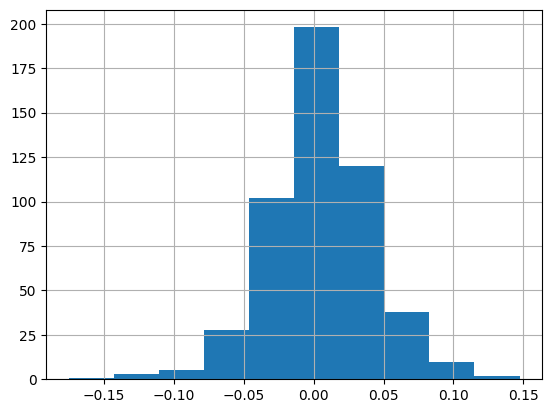

In [ ]:
new_df["AAPL_PX_LAST_Returns"].hist()

In [ ]:
# #Standardize
# #df_non_numeric = new_df.select_dtypes(exclude=[float, int])
# df_numeric = new_df.select_dtypes(include=[float, int])
# scaling=StandardScaler()
# scaling.fit(df_numeric)
# Scaled_data=scaling.transform(df_numeric)


In [ ]:
df_numeric = new_df.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns)
df_non_numeric = new_df.select_dtypes(exclude=[float, int])
df_final = pd.concat([df_scaled, df_non_numeric], axis=1)

In [ ]:
df_final.head()

,AAPL_PX_LAST,AAPL_Dividend_Per_Share,AAPL_TOTAL_EQUITY,AAPL_CUR_MKT_CAP,AAPL_gics_industry,AAPL_gics_sector,AAPL_Year,AAPL_TOT_COMPENSATION_AW_TO_EXECS,AAPL_TOT_SALARIES_BNS_PD_TO_EXECS,AAPL_TOT_N_EQTY_INCENT_GIVEN_TO_EXECS,...,WMT_gics_industry_name,WMT_gics_industry_group_name,WMT_DATE_OF_LAST_EXECUTIVE_CHANGE,WMT_DATE_OF_LAST_BOD_CHANGE,XOM_gics_sector_name,XOM_gics_sub_industry_name,XOM_gics_industry_name,XOM_gics_industry_group_name,XOM_DATE_OF_LAST_EXECUTIVE_CHANGE,XOM_DATE_OF_LAST_BOD_CHANGE
0,-1.085666,-1.682868,0.730651,-1.118006,0.0,0.0,-1.645564,3.347370,2.415186,2.444659,...,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,2014-01-31,2013-12-31,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,2013-01-01,2014-05-23
1,-1.082283,-1.682868,0.730651,-1.112273,0.0,0.0,-1.645564,3.292498,2.369789,2.399255,...,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,2014-01-31,2013-12-31,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,2013-01-01,2014-05-23
2,-1.052406,-1.682868,0.730651,-1.082829,0.0,0.0,-1.645564,3.027370,2.150444,2.179876,...,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,2014-01-31,2013-12-31,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,2013-01-01,2014-05-23
3,-1.039265,-1.682868,0.730651,-1.061390,0.0,0.0,-1.645564,2.850283,2.003938,2.033347,...,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,2014-01-31,2013-12-31,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,2013-01-01,2014-05-23
4,-1.043752,-1.682868,0.730651,-1.068700,0.0,0.0,-1.645564,2.909261,2.052731,2.082147,...,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,2014-01-31,2013-12-31,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,2013-01-01,2014-05-23


In [ ]:

# mu = np.mean(new_df["AAPL_PX_LAST"])
# sigma = np.std(new_df["AAPL_PX_LAST"])
# scaled_df = (new_df['AAPL_PX_LAST'] - mu )/ sigma

<Axes: xlabel='AAPL_TOT_N_EQTY_INCENT_GIVEN_TO_EXECS', ylabel='Count'>

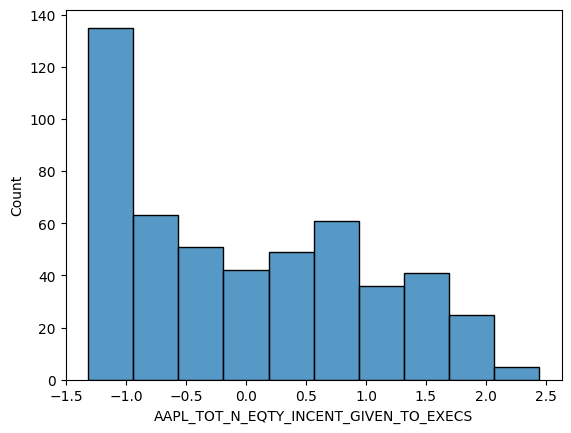

In [ ]:
#sample output
sns.histplot(df_final["AAPL_TOT_N_EQTY_INCENT_GIVEN_TO_EXECS"])

In [ ]:
#exclude dates for OHE
df_non_dates =df_final.select_dtypes(exclude=['datetime'])

In [ ]:
data_ohe=pd.get_dummies(df_non_dates)

In [ ]:
#***considering only numaric values
#n=len(df_scaled.keys()) #number of components to keep
n=50

In [ ]:
data_ohe.dropna(inplace=True)

In [ ]:
pca=PCA(n_components=n)
pca.fit(data_ohe)
Data_pca=pca.transform(data_ohe)
#eigenVectors=Data_pca.components_

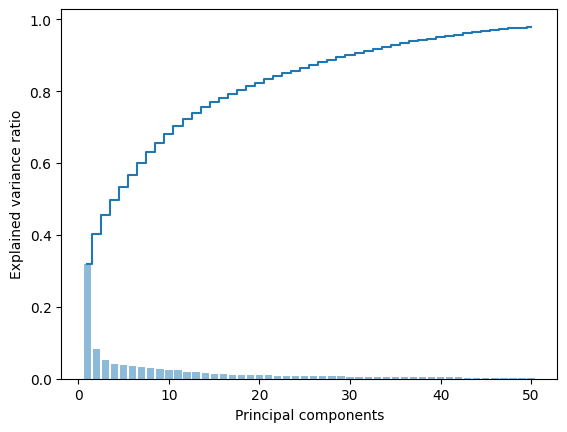

In [ ]:
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31888995, 0.4028536 , 0.45561984, 0.49641764, 0.53388684,
       0.56801236, 0.59946648, 0.62968029, 0.65537285, 0.68019551,
       0.70321374, 0.72271201, 0.74049615, 0.75680594, 0.76933564,
       0.78174784, 0.79266692, 0.80335244, 0.81341278, 0.82342756,
       0.8327359 , 0.8411881 , 0.84938738, 0.85730583, 0.86507349,
       0.87284092, 0.88041379, 0.88719798, 0.8939039 , 0.9000052 ,
       0.90603359, 0.91190244, 0.91765645, 0.92341027, 0.92890161,
       0.93407249, 0.93844286, 0.9423187 , 0.94615227, 0.94989277,
       0.95363324, 0.95714633, 0.9604343 , 0.96372224, 0.96663591,
       0.96934934, 0.97186312, 0.97432913, 0.97679512, 0.97926107])

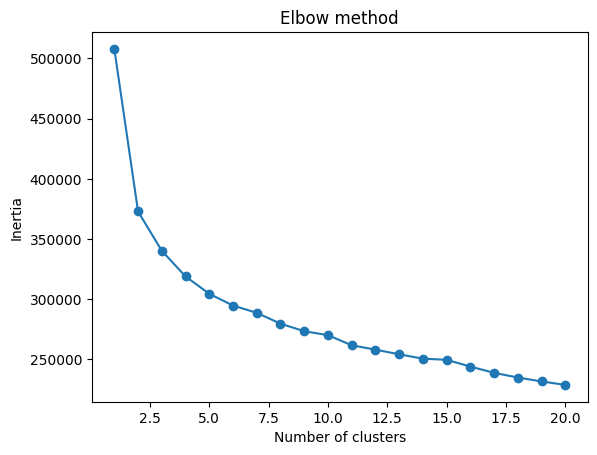

In [ ]:
#Kmeans
#elbow method (irst 10 PC)
#we can also take into acount the silhouette score
inertias = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Data_pca[:,0:20])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(Data_pca)
labels = kmeans.labels_

<Axes: >

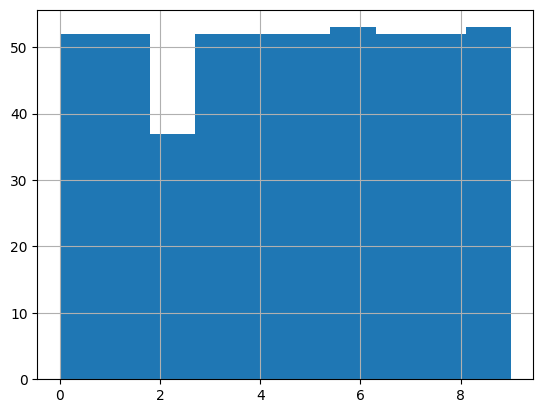

In [ ]:
#Visualizing distribution for n_clusters=5
pd.DataFrame(labels)[0].hist()

In [ ]:
df_non_dates.dropna(inplace=True)
df_non_dates["labels"] = labels

In [ ]:
df_non_dates[df_non_dates["labels"]==1]

,AAPL_PX_LAST,AAPL_Dividend_Per_Share,AAPL_TOTAL_EQUITY,AAPL_CUR_MKT_CAP,AAPL_gics_industry,AAPL_gics_sector,AAPL_Year,AAPL_TOT_COMPENSATION_AW_TO_EXECS,AAPL_TOT_SALARIES_BNS_PD_TO_EXECS,AAPL_TOT_N_EQTY_INCENT_GIVEN_TO_EXECS,...,WFC_gics_industry_group_name,WMT_gics_sector_name,WMT_gics_sub_industry_name,WMT_gics_industry_name,WMT_gics_industry_group_name,XOM_gics_sector_name,XOM_gics_sub_industry_name,XOM_gics_industry_name,XOM_gics_industry_group_name,labels
404,1.649436,1.049619,-0.907064,1.714332,0.0,0.0,1.201423,-0.994152,-1.220485,-1.156593,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
405,1.665461,1.049619,-0.907064,1.732059,0.0,0.0,1.201423,-0.999679,-1.224829,-1.161119,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
406,1.475657,1.049619,-0.907064,1.522089,0.0,0.0,1.201423,-0.930291,-1.170286,-1.104284,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
407,1.616675,1.049619,-0.907064,1.675023,0.0,0.0,1.201423,-0.981690,-1.210689,-1.146385,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
408,1.653354,1.049619,-0.907064,1.715562,0.0,0.0,1.201423,-0.994538,-1.220788,-1.156908,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
409,1.586584,1.049619,-0.907064,1.641765,0.0,0.0,1.201423,-0.970916,-1.202220,-1.137560,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
410,1.562725,1.049619,-0.907064,1.615395,0.0,0.0,1.201423,-0.962218,-1.195383,-1.130436,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
411,1.519102,1.049619,-0.907064,1.567182,0.0,0.0,1.201423,-0.945950,-1.182595,-1.117110,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
412,1.489189,1.049619,-0.907064,1.534121,0.0,0.0,1.201423,-0.934512,-1.173605,-1.107742,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1
413,1.338913,1.049619,-0.907064,1.368030,0.0,0.0,1.201423,-0.873293,-1.125484,-1.057598,...,Banks,Consumer Staples,Consumer Staples Merchandise Retail,Consumer Staples Distribution & Retail,Consumer Staples Distribution & Retail,Energy,Integrated Oil & Gas,"Oil, Gas & Consumable Fuels",Energy,1


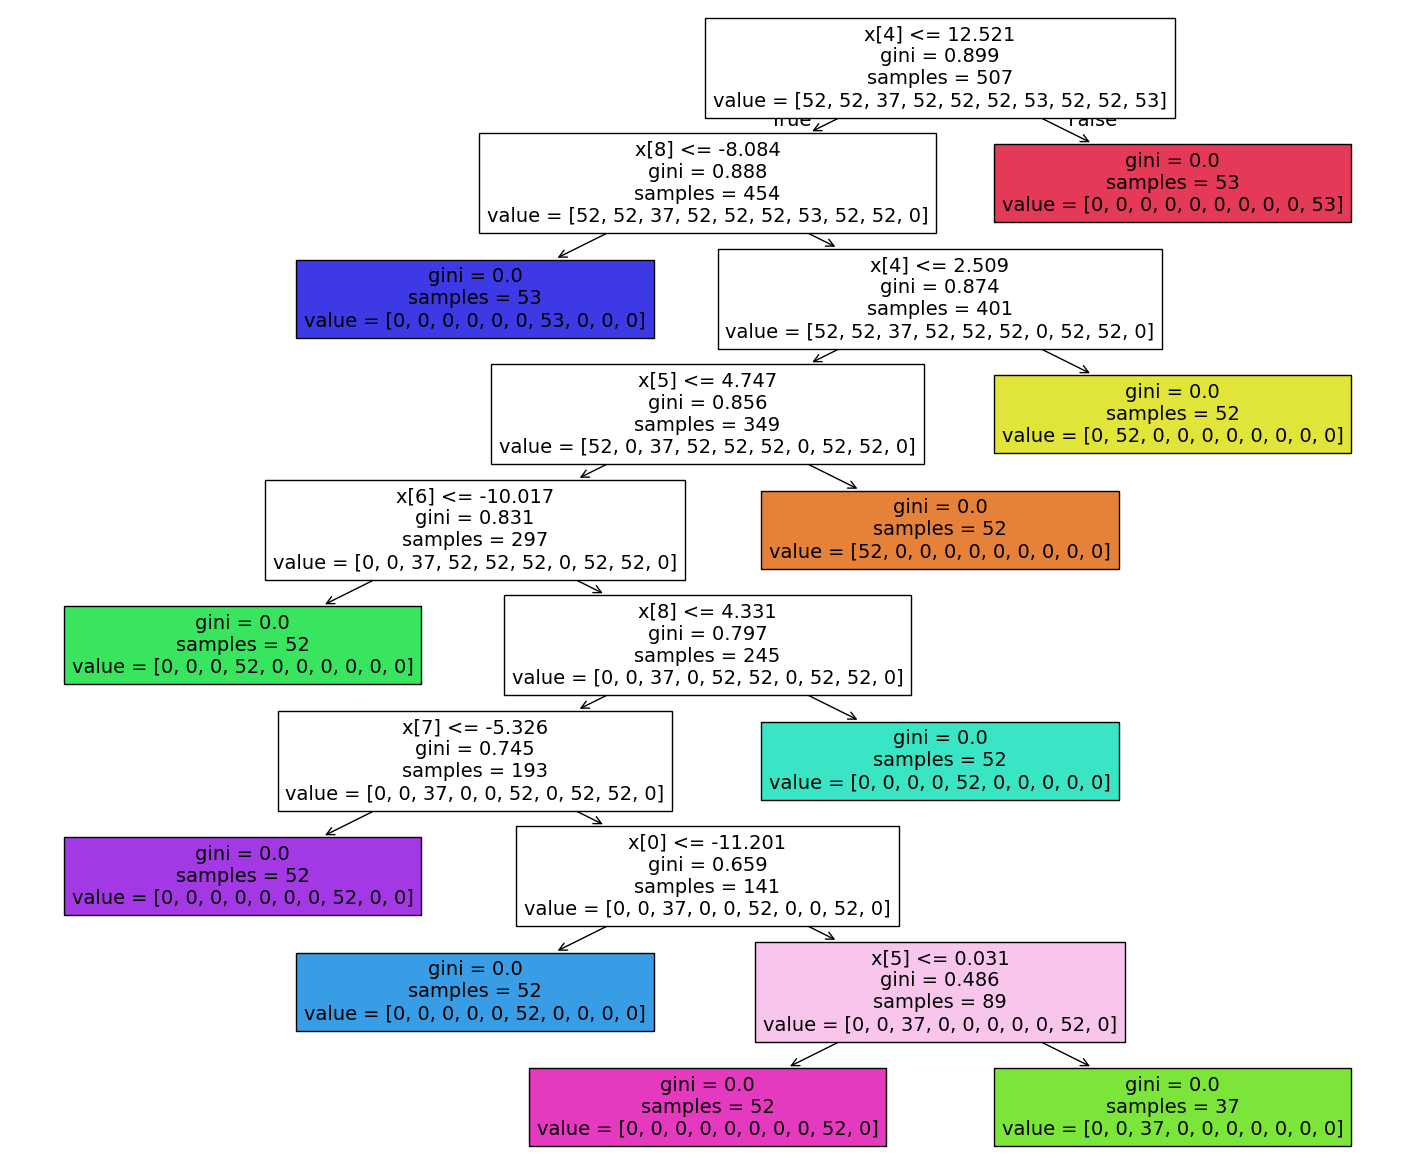

In [ ]:
#deition tree
# we can also consider other ML models such as random foest

clf = DecisionTreeClassifier(random_state=1)
# train the classifier (we can consider  test train split)
clf.fit(Data_pca, labels)

plt.figure(figsize=(18, 15))
plot_tree(clf, filled=True)
plt.show()

In [ ]:
def standardize_group(group):
    df_numeric = group.select_dtypes(include=[float, int])
    scaler = StandardScaler()
    scaled_columns = scaler.fit_transform(df_numeric)
    scaled_df = pd.DataFrame(scaled_columns, columns=df_numeric.columns, index=group.index)
    df_non_numeric = group.select_dtypes(exclude=[float, int])
    df_final = pd.concat([scaled_df, df_non_numeric], axis=1)
    df_final.drop("symbol",axis=1,inplace=True)
    return group[['symbol']].join(df_final)

# Apply standardization within each 'category' group
standardized_df = Data.groupby('symbol', group_keys=False).apply(standardize_group)

<ipython-input-64-7b473f6785e6>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  standardized_df = Data.groupby('symbol', group_keys=False).apply(standardize_group)


In [ ]:
df_non_dates_2 =standardized_df.select_dtypes(exclude=['datetime'])

In [ ]:
df_non_dates_2.dropna(inplace=True)

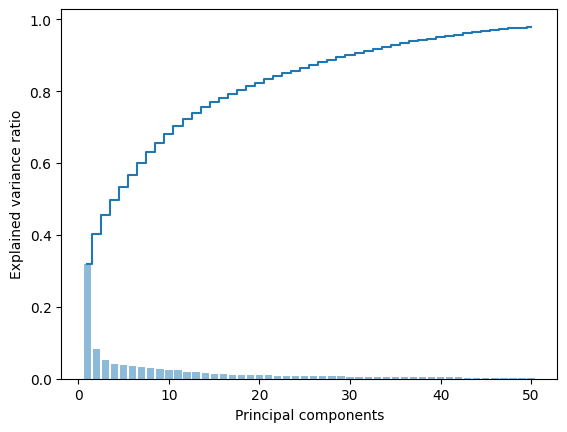

In [ ]:
#standardized_df.dropna(inplace=True)
data_ohe_2=pd.get_dummies(df_non_dates_2)
pca_2=PCA(n_components=n)
pca_2.fit(data_ohe_2)
Data_pca=pca.transform(data_ohe_2)
#eigenVectors=Data_pca.components_
plt.bar(range(1, n+1), pca_2.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

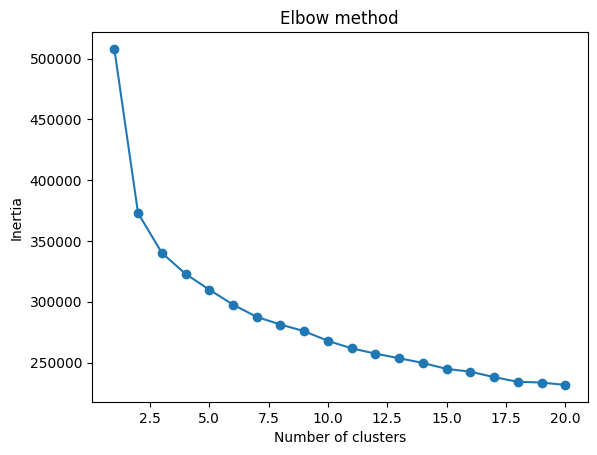

In [ ]:
#Kmeans
#elbow method (irst 10 PC)
#we can also take into acount the silhouette score
inertias = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Data_pca[:,0:20])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Specify the threshold
n = 0.7

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed
num_components = np.searchsorted(cumulative_variance, n) + 1

print(f"Number of columns needed to reach an explained variance of {n}: {num_components}")

Number of columns needed to reach an explained variance of 0.7: 11


In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31888995, 0.4028536 , 0.45561984, 0.49641764, 0.53388684,
       0.56801236, 0.59946648, 0.62968029, 0.65537285, 0.68019551,
       0.70321374, 0.72271201, 0.74049615, 0.75680594, 0.76933564,
       0.78174784, 0.79266692, 0.80335244, 0.81341278, 0.82342756,
       0.8327359 , 0.8411881 , 0.84938738, 0.85730583, 0.86507349,
       0.87284092, 0.88041379, 0.88719798, 0.8939039 , 0.9000052 ,
       0.90603359, 0.91190244, 0.91765645, 0.92341027, 0.92890161,
       0.93407249, 0.93844286, 0.9423187 , 0.94615227, 0.94989277,
       0.95363324, 0.95714633, 0.9604343 , 0.96372224, 0.96663591,
       0.96934934, 0.97186312, 0.97432913, 0.97679512, 0.97926107])

In [ ]:
inertias

[507878.20822245785,
 372878.23368727806,
 340234.5875313918,
 322882.24977819185,
 309959.8807224183,
 297626.9876643176,
 287538.4545141266,
 281245.4425400015,
 275781.8727435947,
 267813.2583411673,
 261700.5727789791,
 257332.80084376212,
 253548.94509665578,
 249657.44820861093,
 244766.45463146715,
 242465.72071787724,
 238015.20798010947,
 234183.77187888496,
 233528.69025930777,
 231587.37333935787]

In [ ]:
Data.to_csv("/content/drive/My Drive/GQG/OriginalData_2.csv")